In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("../WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [5]:
df_orig = pd.read_csv("../WA_Fn-UseC_-Telco-Customer-Churn.csv")

all_cols = df.columns
forLabel = []
for i in all_cols:
    if(df[i].nunique() <= 2):
        print(f"{i} → {df[i].nunique()} unique values and they are " , df[i].unique())
        forLabel.append(i)
    else:
        continue
    print("\n")
    
print(forLabel)

gender → 2 unique values and they are  ['Female' 'Male']


SeniorCitizen → 2 unique values and they are  [0 1]


Partner → 2 unique values and they are  ['Yes' 'No']


Dependents → 2 unique values and they are  ['No' 'Yes']


PhoneService → 2 unique values and they are  ['No' 'Yes']


PaperlessBilling → 2 unique values and they are  ['Yes' 'No']


Churn → 2 unique values and they are  ['No' 'Yes']


['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']


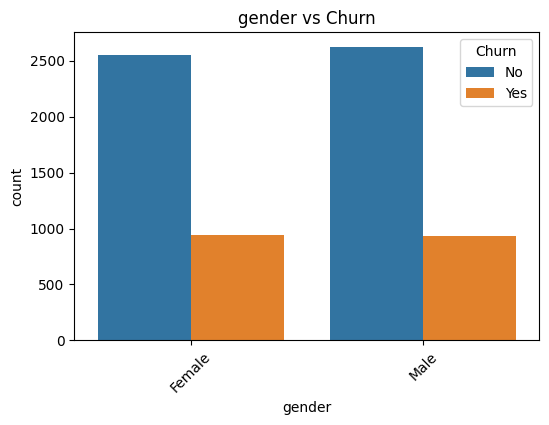

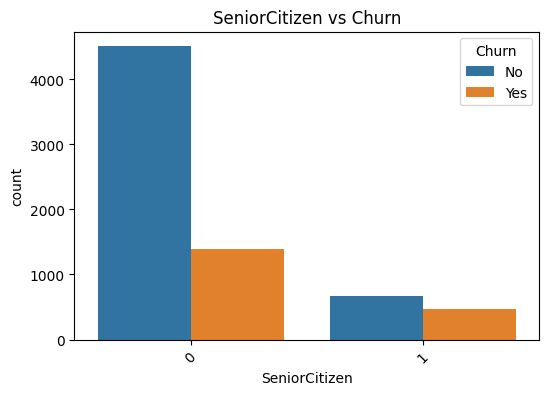

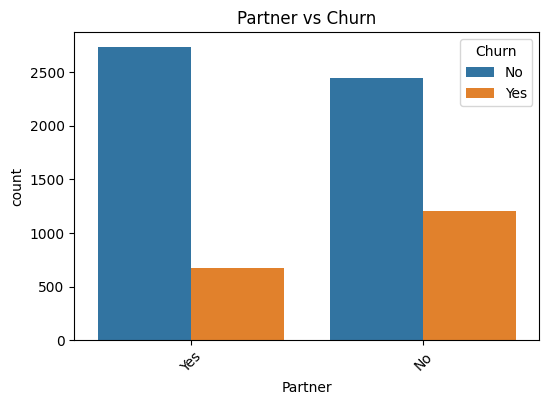

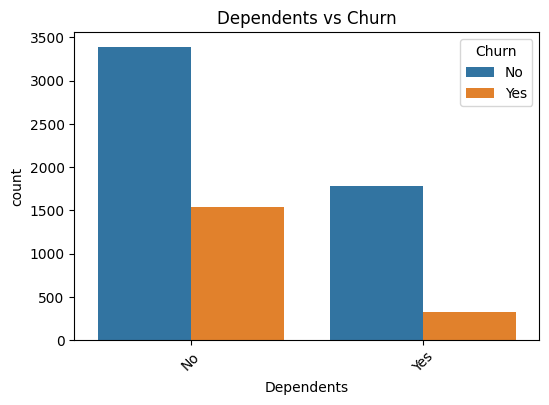

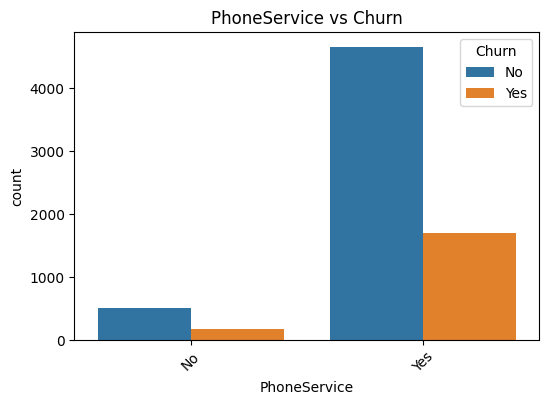

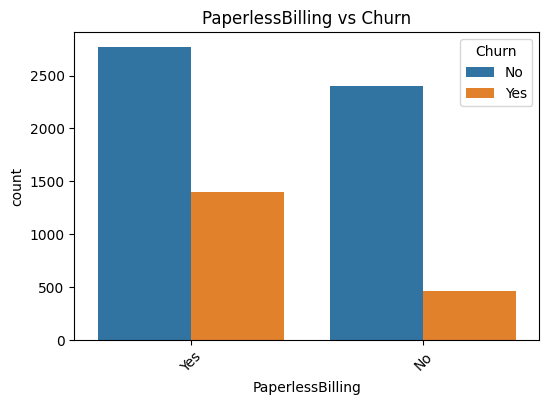

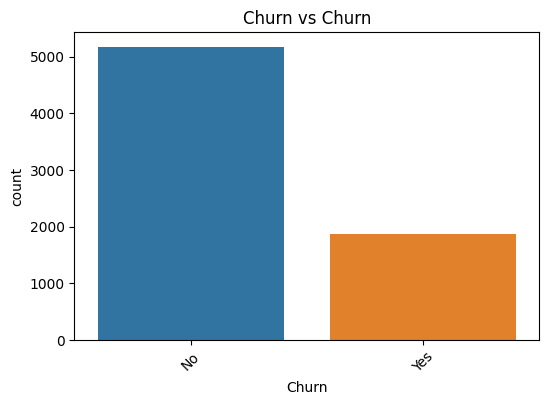

In [6]:
cols = [c for c in forLabel if c != 'churn']

# loop in chunks of 5
for col in cols:   # the list of categorical columns
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue="Churn")   # use original dataframe
    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=45)
    plt.show()


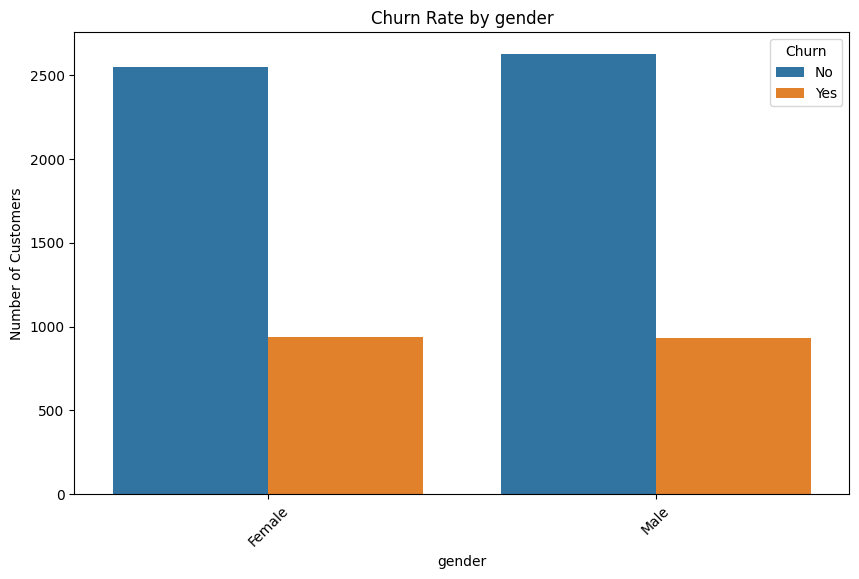

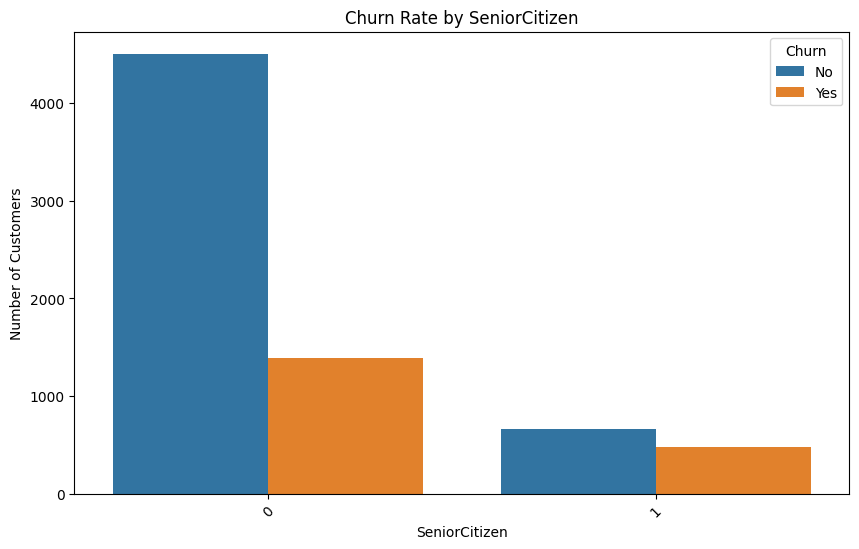

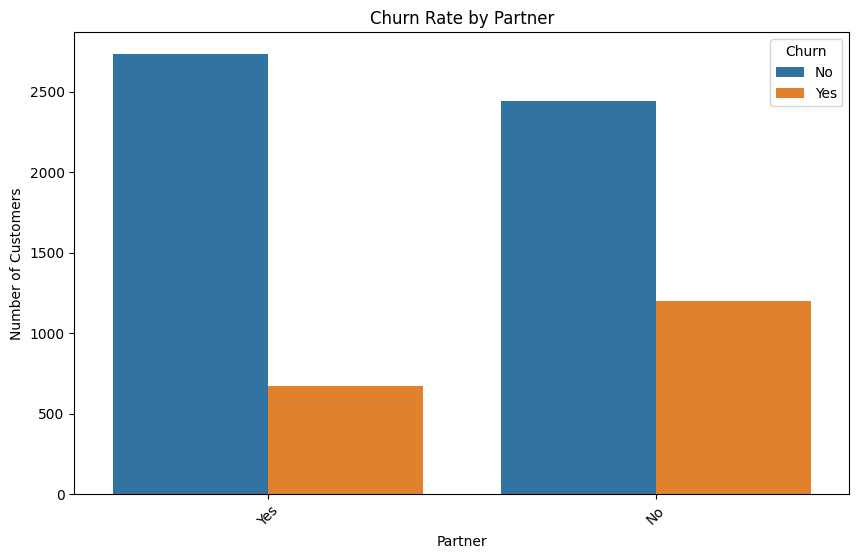

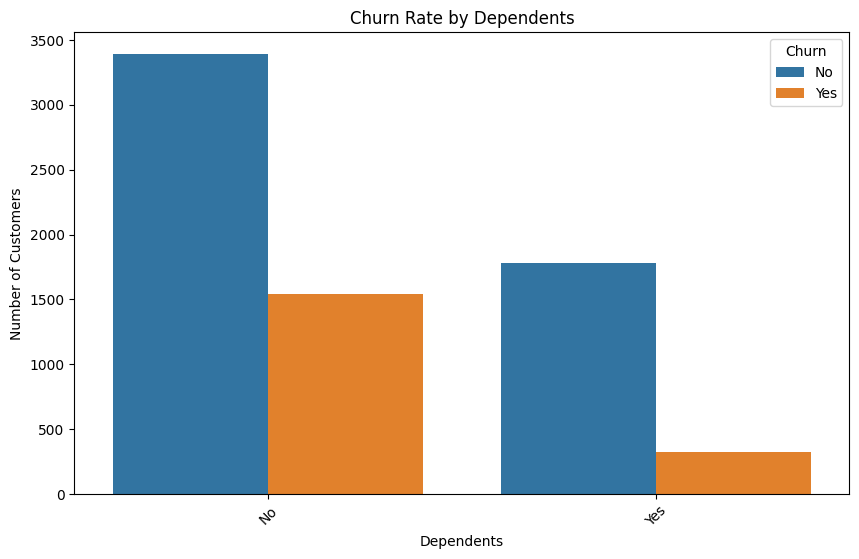

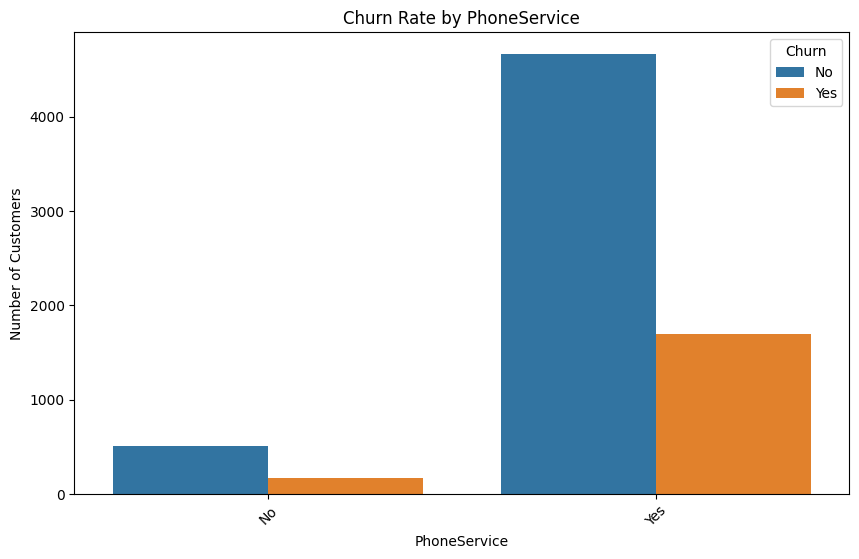

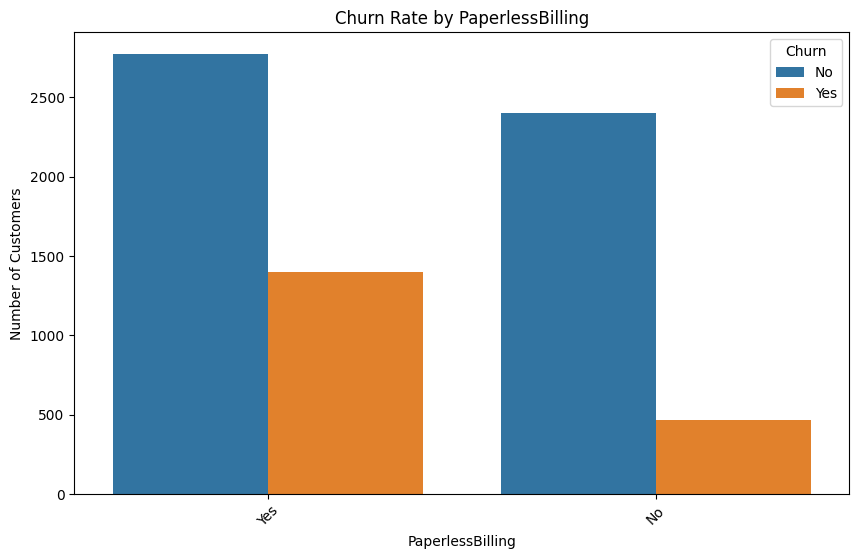

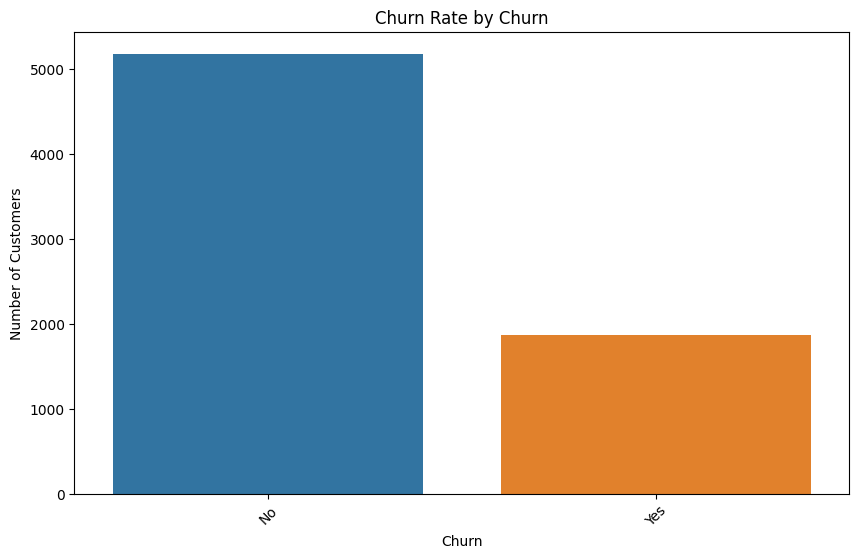

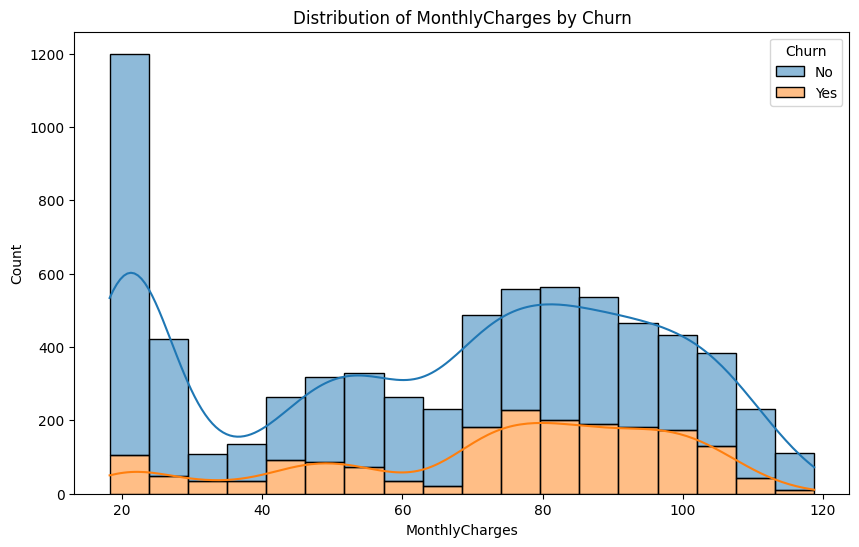

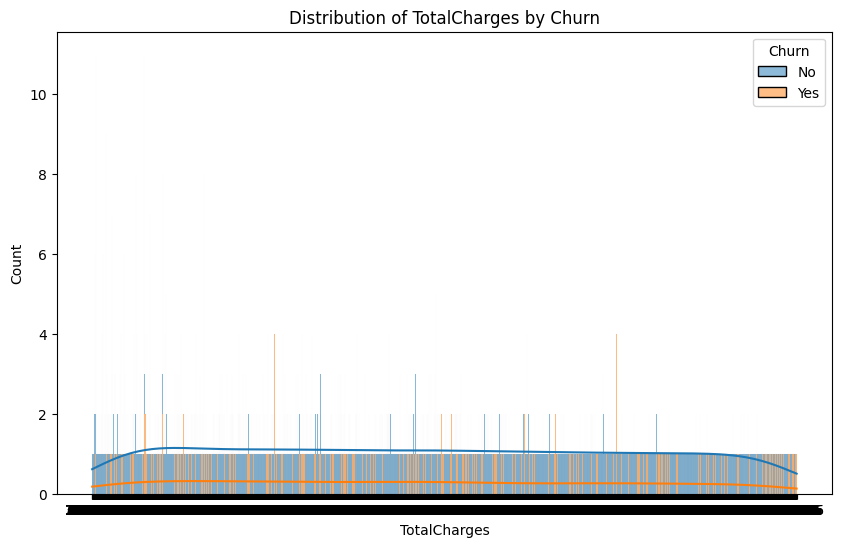

In [7]:
for feature in forLabel:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='Churn', data=df)
    plt.title(f'Churn Rate by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Number of Customers')
    plt.xticks(rotation=45)
    plt.show()

numerical_features = ['MonthlyCharges', 'TotalCharges']

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=feature, hue='Churn', multiple='stack', kde=True)
    plt.title(f'Distribution of {feature} by Churn')
    plt.show()
    
    
# we can see that in this , gender is not playing any role because , even if the gender is 1 or 0 , the distribution is equal

Training Model for SHAPASH

In [8]:
df = pd.read_csv("./WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

x = df.drop("Churn", axis=1)
y = df["Churn"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

FileNotFoundError: [Errno 2] No such file or directory: './WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

model = RandomForestClassifier(random_state=42, n_jobs=-1)

preprocessor = ColumnTransformer(
    transformers=[],
    remainder='passthrough'
)

model = RandomForestClassifier(random_state=42, n_jobs=-1)

smote_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', model)
])

param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20]
}


stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    smote_pipeline,
    param_grid,
    cv=stratified_kfold,
    scoring='roc_auc',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print(f"\nBest parameters found: {grid_search.best_params_}")
print(f"Best ROC AUC score on validation set: {grid_search.best_score_:.4f}")

print("\n--- Final Model Evaluation on Test Set ---")


best_model = grid_search.best_estimator_


y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

In [ ]:
#  Using SHAPASH for visualisation and features understanding

from shapash.explainer.smart_explainer import SmartExplainer
tempDF = df.drop(["Churn"],axis=1)
X_test = pd.DataFrame(X_test, columns=tempDF.columns)  
# feature_names = list of your feature names

# Predictions as Series
y_pred = pd.Series(best_model.predict(X_test), index=X_test.index)
    
xpl = SmartExplainer(model=best_model)
xpl.compile(
    x=X_test,
    y_pred=y_pred
)

In [ ]:
xpl.run_app(host="127.0.0.1", port=8050)